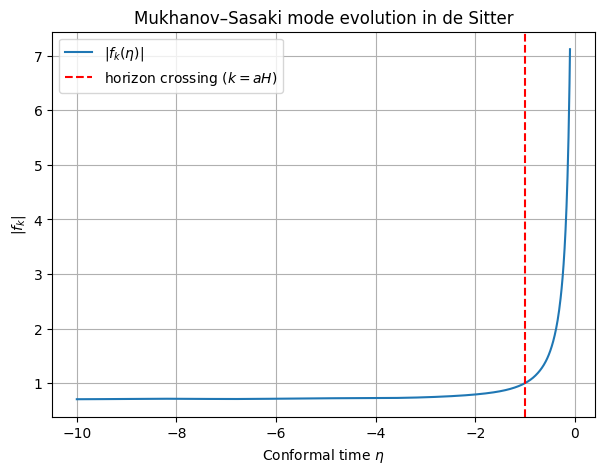

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters
H = 1.0       # Hubble parameter (set to 1 in units)
k = 1.0       # comoving wavenumber
eta_min = -1  0.0
eta_max = -0.1

# Define the system: f'' + (k^2 - 2/eta^2) f = 0
def ms_eq(eta, y):
    f, fp = y
    d2f = -(k**2 - 2/eta**2) * f
    return [fp, d2f]

# Initial conditions: Bunch-Davies vacuum deep inside horizon
# f(eta) ~ exp(-i k eta) / sqrt(2k)
f0 = np.exp(-1j * k * eta_min) / np.sqrt(2*k)
fp0 = (-1j * k) * np.exp(-1j * k * eta_min) / np.sqrt(2*k)

y0 = [f0, fp0]

# Solve ODE
sol = solve_ivp(ms_eq, [eta_min, eta_max], y0, t_eval=np.linspace(eta_min, eta_max, 1000))

# Extract solution
etas = sol.t
f_vals = sol.y[0]

# Plot |f_k| vs eta
plt.figure(figsize=(7,5))
plt.plot(etas, np.abs(f_vals), label=r"$|f_k(\eta)|$")
plt.axvline(x=-1/k, color="r", linestyle="--", label="horizon crossing ($k=aH$)")
plt.xlabel(r"Conformal time $\eta$")
plt.ylabel(r"$|f_k|$")
plt.legend()
plt.title("Mukhanov–Sasaki mode evolution in de Sitter")
plt.grid(True)
plt.show()


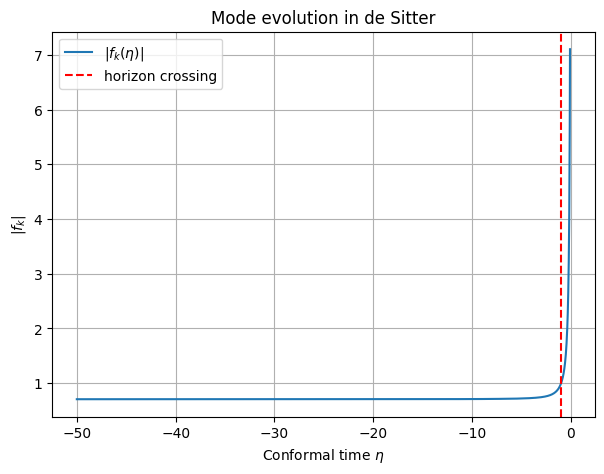

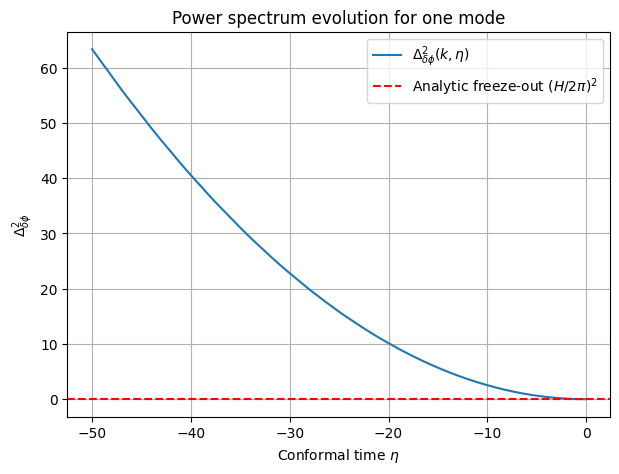

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters
H = 1.0       # Hubble parameter
k = 1.0       # comoving wavenumber
eta_min = -50.0   # early time (deep inside horizon)
eta_max = -0.1    # near end of inflation
N_pts = 2000

# Scale factor in de Sitter
def a(eta):
    return -1.0 / (H * eta)

# Mukhanov–Sasaki ODE: f'' + (k^2 - 2/eta^2) f = 0
def ms_eq(eta, y):
    f, fp = y
    d2f = -(k**2 - 2/eta**2) * f
    return [fp, d2f]

# Bunch–Davies initial conditions at eta_min
f0 = np.exp(-1j * k * eta_min) / np.sqrt(2*k)
fp0 = (-1j * k) * np.exp(-1j * k * eta_min) / np.sqrt(2*k)
y0 = [f0, fp0]

# Solve ODE
etas = np.linspace(eta_min, eta_max, N_pts)
sol = solve_ivp(ms_eq, [eta_min, eta_max], y0, t_eval=etas)

# Extract solution
f_vals = sol.y[0]

# Compute power spectrum of delta phi
Delta2 = (k**3 / (2*np.pi**2)) * (np.abs(f_vals)**2 / a(etas)**2)

# Plot |f_k| vs eta
plt.figure(figsize=(7,5))
plt.plot(etas, np.abs(f_vals), label=r"$|f_k(\eta)|$")
plt.axvline(x=-1/k, color="r", linestyle="--", label="horizon crossing")
plt.xlabel(r"Conformal time $\eta$")
plt.ylabel(r"$|f_k|$")
plt.title("Mode evolution in de Sitter")
plt.legend()
plt.grid(True)
plt.show()

# Plot power spectrum vs eta
plt.figure(figsize=(7,5))
plt.plot(etas, Delta2, label=r"$\Delta_{\delta\phi}^2(k,\eta)$")
plt.axhline(y=(H/(2*np.pi))**2, color="r", linestyle="--",
            label=r"Analytic freeze-out $(H/2\pi)^2$")
plt.xlabel(r"Conformal time $\eta$")
plt.ylabel(r"$\Delta_{\delta\phi}^2$")
plt.title("Power spectrum evolution for one mode")
plt.legend()
plt.grid(True)
plt.show()
